In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,roc_curve,auc)
import joblib

In [2]:
#load dataset
df=pd.read_csv("framingham.csv")
print(df.to_string())

#Drop non revelant column
df.drop(['education'],axis=1,inplace=True)
df.rename(columns={'male':'gender_male'},inplace=True)
df.dropna(inplace=True)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD
0        1   39        4.0              0         0.0     0.0                0             0         0    195.0  106.0   70.0  26.97       80.0     77.0           0
1        0   46        2.0              0         0.0     0.0                0             0         0    250.0  121.0   81.0  28.73       95.0     76.0           0
2        1   48        1.0              1        20.0     0.0                0             0         0    245.0  127.5   80.0  25.34       75.0     70.0           0
3        0   61        3.0              1        30.0     0.0                0             1         0    225.0  150.0   95.0  28.58       65.0    103.0           1
4        0   46        3.0              1        23.0     0.0                0             0         0    285.0  130.0   84.0  23.10       85.0     85.0           0
5        0

In [3]:
#Display datsets info
print("First few rows of the cleaned dataset:\n",df.head())
print("Dataset shape:",df.shape)
print("CHD cases (TenYearCHD):\n",df.TenYearCHD.value_counts())
#Feature selection and target variables
features=['age','gender_male','cigsPerDay','totChol','sysBP','glucose']
X=df[features].values
y=df['TenYearCHD'].values

First few rows of the cleaned dataset:
    gender_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39              0         0.0     0.0                0   
1            0   46              0         0.0     0.0                0   
2            1   48              1        20.0     0.0                0   
3            0   61              1        30.0     0.0                0   
4            0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1 

In [4]:
#Normalize feature values
X=preprocessing.StandardScaler().fit_transform(X)
#split into train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
print("Training set shape:",X_train.shape)
print("Test set shape:",X_test.shape)

Training set shape: (2625, 6)
Test set shape: (1126, 6)


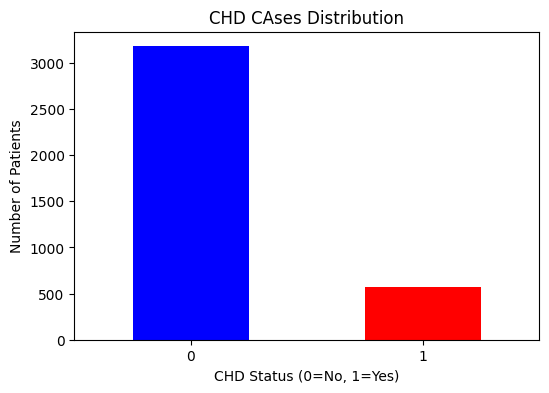

In [5]:
#Visualize target variables distribution
df['TenYearCHD'].value_counts().plot(kind='bar',color=['blue','red'],figsize=(6,4))
plt.xlabel('CHD Status (0=No, 1=Yes)')
plt.ylabel('Number of Patients')
plt.title('CHD Cases Distribution')
plt.xticks(rotation=0)
plt.show()

In [6]:
#Traun logistc reg model
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

#Evaluate logistic regression model with accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Logistic Regression Accuracy:{accuracy:.2f}")

Logistic Regression Accuracy:0.85


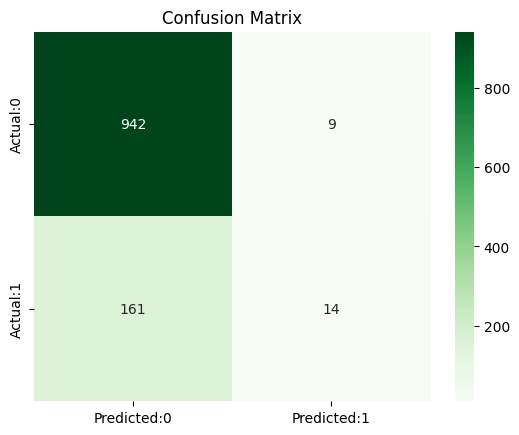

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [7]:
#Confusion matrix visualizaton
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm,index=['Actual:0','Actual:1'],columns=['Predicted:0',
'Predicted:1']),annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix')
plt.show()
#
print("Classification Report:\n",classification_report(y_test,y_pred))

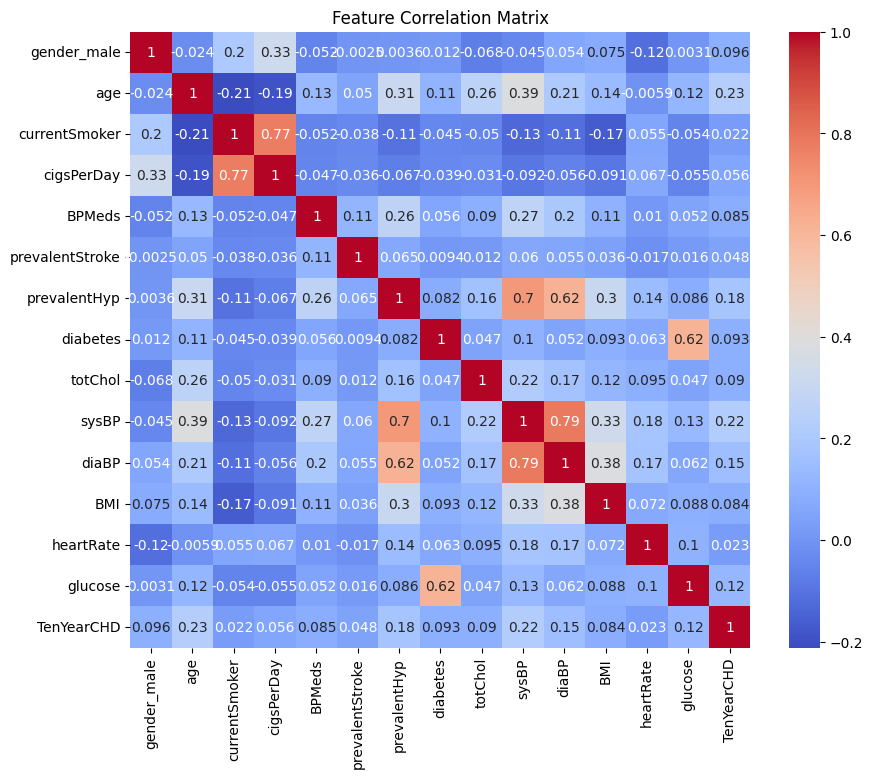

In [8]:
#correlation matrix heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

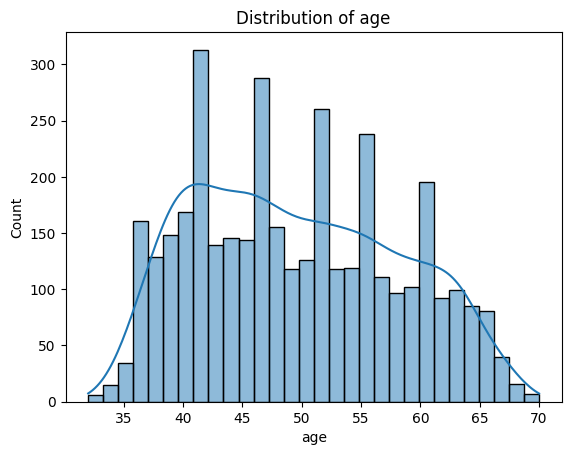

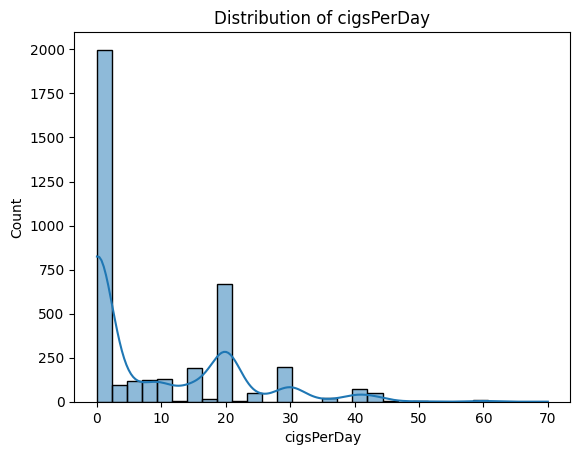

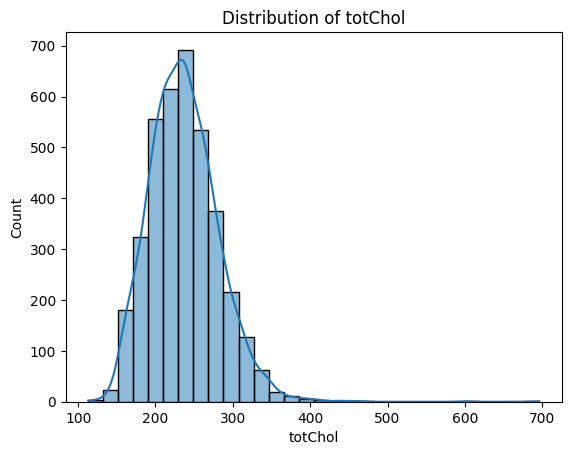

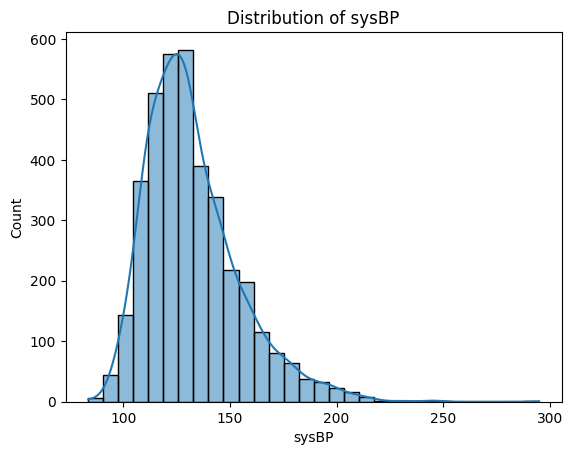

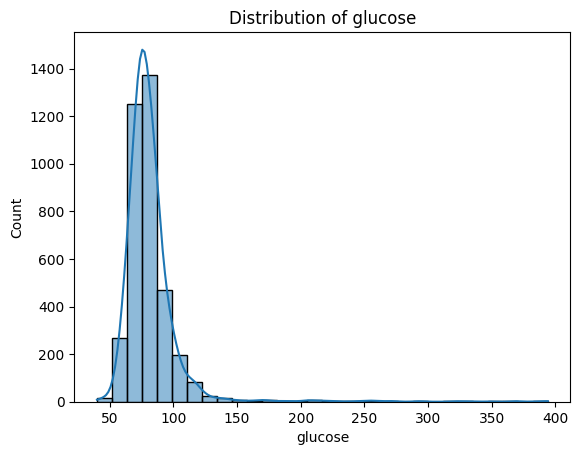

In [10]:
# Distribution plots
for feature in ['age','cigsPerDay','totChol','sysBP','glucose']:
    sns.histplot(df[feature],kde=True,bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [12]:
#Cross Validation
cv_scores=cross_val_score(logreg, X, y, cv=5)
print("Cross-validation scores:",cv_scores)
print("Average CV score:",cv_scores.mean())
#Train and evaluate a Random Forest model
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_rf_pred=rf_model.predict(X_test)
print("Random Forest Accuracy:",accuracy_score(y_test,y_rf_pred))

Cross-validation scores: [0.84953395 0.85333333 0.84533333 0.856      0.848     ]
Average CV score: 0.8504401242787395
Random Forest Accuracy: 0.8410301953818827


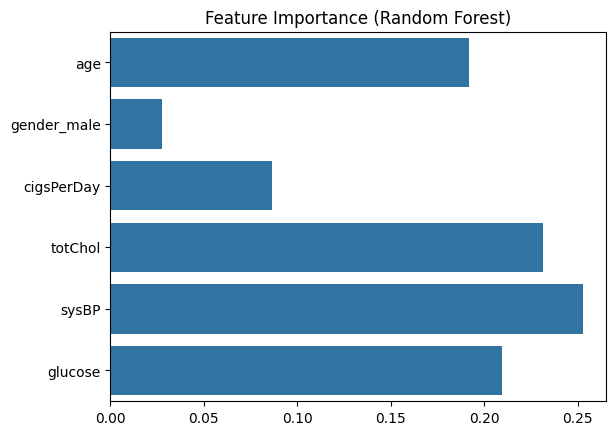

Model saved as 'logistic_regression_model.pkl'


In [13]:
#Feature importance plot
sns.barplot(x=rf_model.feature_importances_,y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

#Save the logistic regression model
joblib.dump(logreg, 'logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl'")

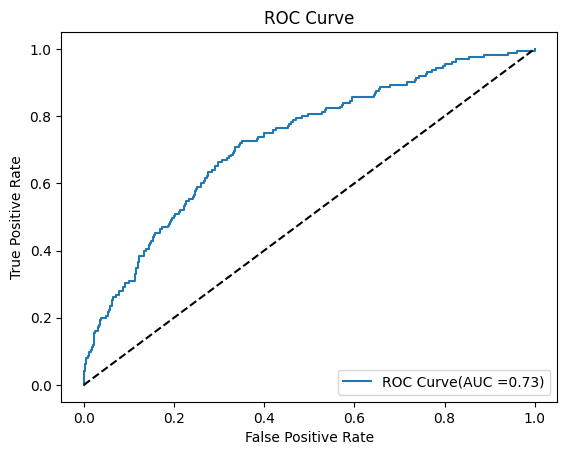

In [17]:
#plot ROC curve
y_pred_prob=logreg.predict_proba(X_test)[:,1]
fpr, tpr, _=roc_curve(y_test, y_pred_prob)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f"ROC Curve(AUC ={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()